# Learning Transferable Visual Models From Natural Language Supervision

[2103.00020] Learning Transferable Visual Models From Natural Language Supervision (arxiv.org)
https://arxiv.org/abs/2103.00020

https://github.com/openai/CLIP

## 1. Instroduction

거대한 NLP모델들이 공개되며 이것들을 Fine-tuning과 Transfer-learning등 활용해 여러 분야에 적용하는 것이 매우 좋은 성능을 내고 있어 여러 분야에서 사용되고 있다.

그렇다면, 이런 text 모델들을 vision분야와 연계에서 사용하려면 어떤 방법을 사용하면 될까?
ViT나 CNN(ResNet, VggNet)등은 이미지 자체로만 학습시키면 좋은 성능을 내지만 text와 함께 입력하면 쉽게 학습 되기 힘들다.

이런 vision-text모델에서 zero-shot learning 까지 가능한 CLIP 모델이 공개되어 이미지와 텍스트를 연결해 주면서 Vision 분야에서 여러 SOTA 모델의 기반이 되어주고 있고, 멀티모달 분야의 필수적인 기반이 되었다.


## 2. Apporach

![image](https://github.com/openai/CLIP/raw/main/CLIP.png)

CLIP은 처음에 Contrastive pre-training 과정을 거친다. 각각의 encoder를 거친 text, image 데이터에 대한 embedding의 유사도를 계산하여 이를 각각 계산하는 방식이다. 
1. **Contrastive pre-training**을 보면 여기서 대각 행렬(text와 image의 의미가 일치하는 쌍)에 있는 값들이 유사도가 가장 크고, 나머지 대각 행렬이 아닌 곳(text와 image의 의미가 일치하지 않는 쌍)에 있는 값들은 유사도가 낮도록 loss function을 구성하여 학습이 진행된다.


2. **create dataset calssifier from label text**과정을 보면 특정 데이터셋의 label에 해당하는 text를 사용해서 dataset classifier를 구축한다. 이 text들을 text encoder를 통과시켜 text에 대한 embedding을 생성한다. 이 임베딩은 각 레이블에 대한 벡터로 작용한다.


3. **Use for zero-shot prediction**에서 새로운 이미지를 넣어주면 image encoder를 거쳐 벡터로 변화시키고, 위의 과정에서 나온 text embedding과 유사도를 계산해 가장 유사도가 높은 항목을 새로운 image에 대한 text label로 선정한다.


여기서의 특징은 학습에 이용되지 않았던 image를 입력해도, label prediction이 이루어 질 수 있기 떄문에 Zero-shot learning이 가능하다.


Zero-shot learning의 장점은

- 새로운 카테고리에 대한 유연성: 이전에 없던 카테고리나 클래스에 유연하게 모델이 작동할 수 있다.


- 데이터 구축과 labeling 비용 절감: 새로운 데이터에 대한 사전 학습이나 labeling없이도 모델을 사용할 수 있기 떄문에, 데이터 구축과정과 labeling에 드는 비용과 시간을 크게 줄일 수 있다.


- 범용성과 확장성: 위의 장점들과 같이 Zero-shot learning은 모델의 범용성과 확장성이 크기 때문에 학습된 모델을 다른 데이터셋에도 적용할 수 있다.


## 3. Training Method


일단, 연구자들은 인터넷에서 수작업 labeling 없이 웹 크롤링으로 자동으로 이미지와 관련된 자연어 텍스트를 추출하여 4억개의 image-text쌍으로 구성된 새로운 데이터셋을 만들었다.

![image](https://github.com/Mutoy-choi/Study_Deeplearning/assets/87027571/1a3b37c3-d89e-4da1-aa1c-602b41abf653)

이후, 기존 Transformer Language Model과 다르게 **Bag of Words** 인코딩 방식을 사용해서 효율성을 확보했다. 이후 Contrastive Learning으로 학습을 진행한다.

Bag of Words : 문서 내의 단어들을 순서에 상관없이 빈도수에 따라 표현하는 방식이다. 각 단어는 가방(Bag) 안에 있는 하나의 아이템으로 간주되며, 단어의 순서는 고려하지 않는다.

- 장점
단순성: 구현이 간단하고 이해하기 쉬움.
효율성: 대규모 문서 집합에 대한 처리가 비교적 빠름.
- 단점
단어 순서 무시: 문맥이나 문장의 구조를 반영하지 못함.
단어의 중의성: 동일한 단어가 다른 의미를 가질 수 있으나 이를 구분하지 못함.
희소성: 매우 큰 차원의 벡터가 생성되어 효율성이 떨어질 수 있음.

위의 그래프를 보면 Transformer Model보다 Bag of Words Prediction이 3배의 효율을 가지고 있고, CLIP의 Bag of Words Contrastive 방식이 추가로 4배의 효율을 가지고 있는걸 볼 수 있다.


여기서 연구자들은 


**Image Encoder**로 ResNet-50과 ViT를 사용하였다.
ResNet은 조금 수정된 ResNet-D버전을 사용하였다.

 ResNet-D는 다운샘플링을 위해 평균 풀링(average pooling)을 사용하는 특징을 갖는다. 기존의 ResNet에서는 1×1 합성곱을 사용하는 다운샘플링 블록이 입력 피처 맵의 각 위치에서 단일 픽셀값만을 고려하므로, 인접한 픽셀의 정보를 충분히 활용하지 못하여 이로 인해 입력 피처 맵의 대부분 정보가 다운샘플링 과정에서 누락되는 문제가 생겼는데, ResNet-D에서는 평균 풀링을 도입하여 정보가 무시되지 않도록 한다.


ViT는 공개된 기존의 모델을 수정하지 않고 Layer Normalization만 추가했다.


**Text Encoder**로는 Transformer를 사용했다. BPE representation을 이용했다.

BPE representation : BPE(바이트 페어 인코딩) 표현은 텍스트 데이터를 더 효율적으로 처리하기 위해 자주 등장하는 문자 쌍을 반복적으로 병합하여 빈도가 높은 단어나 문자열을 단일 심볼로 인코딩하는 알고리즘이다.

이후
 계산 효율성을 위해 max sequence length는 76으로 text sequence는 [SOS]와[EOS] 으로 구분하고, Transformer의 최상위 레이어에서 text sequence 끝부분에 위치한 [EOS]토큰에 대한 출력을 추출해서(text sequence 끝부분에 위치한 [EOS]토큰이 그 sequence전체의 의미를 대표함) Layer Normalization과 Linear projection을 통해서 text embedding이 되고 CLIP의 Multimodal embedding space로 보내진다.


![image](https://github.com/Mutoy-choi/Study_Deeplearning/assets/87027571/cbd323dd-cefa-4192-a00b-b0b086247e9a)


Multimodal embedding space 로 보내진 text embedding과 image embedding은 위의 그림처럼 각각의 요소에 대한 cosine 유사도를 계산하는 데, 계산하는 방식은 아래와 같다.


![image](https://github.com/Mutoy-choi/Study_Deeplearning/assets/87027571/68e1752f-1fce-4806-8621-5af78e884e7d)



1. 이미지와 텍스트의 특징 추출 (Feature Extraction)
   - 이미지 인코더 (Image Encoder): ResNet 또는 Vision Transformer와 같은 이미지 인코더를 사용하여 이미지의 특징을 추출한다. (`I_f = image_encoder(I)`). 이 결과는 `[n, d_i]` 크기의 행렬로 나타난다, 여기서 `n`은 배치 크기, `d_i`는 이미지 특징의 차원이다.
   - 텍스트 인코더 (Text Encoder): CBOW 또는 Text Transformer와 같은 텍스트 인코더를 사용하여 텍스트의 특징을 추출한다. (`T_f = text_encoder(T)`). 이 결과는 `[n, d_t]` 크기의 행렬로 나타난다, 여기서 `d_t`는 텍스트 특징의 차원이다.

2. 다중 모달 임베딩 (Multimodal Embedding)
   - 이미지와 텍스트 특징은 각각의 프로젝션 매트릭스 `W_i`와 `W_t`를 사용하여 동일한 임베딩 차원 `d_e`로 변환된다.
   - 이후 변환된 임베딩은 L2 정규화를 통해 정규화된다 (`I_e`, `T_e`).

3. 코사인 유사도 계산 및 스케일링 (Scaled Cosine Similarity)
   - 이미지와 텍스트 임베딩 간의 코사인 유사도가 계산된다. 이는 두 임베딩의 내적(dot product)을 통해 이루어진다.
   - 계산된 유사도는 학습된 온도 매개변수 `t`에 의해 스케일링된다 (`logits = np.dot(I_e, T_e.T) * np.exp(t)`).
   - labels는 데이터셋의 image-text 쌍으로 이루어져 있어서 image와 text의 쌍이 올바를 떄는 1, 올바르지 않을 떄는 0으로 구성되어 대각 행렬을 이룬다.

4. 대칭적 손실 함수 (Symmetric Loss Function)
   - 손실 함수는 이미지를 기준으로 한 손실(`loss_i`)과 텍스트를 기준으로 한 손실(`loss_t`)의 평균으로 계산된다.
   - 각 손실은 크로스 엔트로피 손실 함수를 사용하여 계산된다. 이때 정답 label은 해당 이미지와 짝을 이루는 텍스트의 인덱스이다.
   - 최종 손실은 이 두 손실의 평균으로 계산된다. (`loss = (loss_i + loss_t) / 2`).

이후의 내용은 Zero-shot transfer에서의 성능을 위해 Prompt engineering과 ensembling을 해주는 것들이 나온다.

CLIP을 학습시킬때 사용한 데이터셋에서 text data는 주로 문장으로 구성되어있는데, zero-shot으로 이미지 분류를 시킬 때 class name이 대부분 한 단어이기 때문에 만약 class로 cat, dog를 예측한다고 하면 그대로 입력해주는게 아니라 "A photo of a {class}."이렇게 입력해준다.

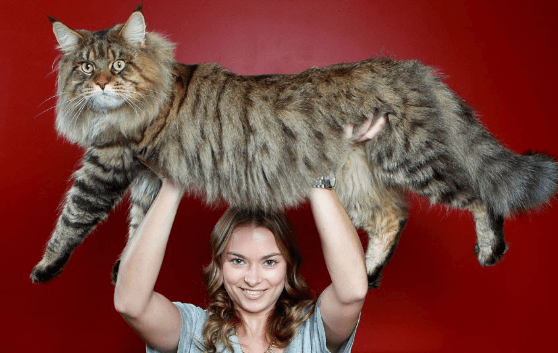

이미지는 다음과 같은 확률로 분류됩니다:
dog: 0.32%
cat: 99.71%


In [ ]:
import torch
import clip
from PIL import Image
import requests

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 텍스트와 이미지 준비
text_inputs = torch.cat([clip.tokenize(f"A photo of {desc}.") for desc in ["dog", "cat"]]).to(device)
image_url = "https://cdn.shopify.com/s/files/1/0997/4496/articles/Capture_776f9c81-43c3-4e02-b8ed-9bcc9b78ac09.PNG?v=1588962019"
image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")
display(image)
image_input = preprocess(image).unsqueeze(0).to(device)


# 이미지와 텍스트의 특징 추출
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# 유사성 계산
logits_per_image, logits_per_text = model(image_input, text_inputs)
probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()

print("이미지는 다음과 같은 확률로 분류됩니다:")
for i, desc in enumerate(["dog", "cat"]):
    print(f"{desc}: {probs[0, i] * 100:.2f}%")


In [ ]:
text_inputs = torch.cat([clip.tokenize(f"{desc}") for desc in ["dog", "cat"]]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# 유사성 계산
logits_per_image, logits_per_text = model(image_input, text_inputs)
probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()

print("이미지는 다음과 같은 확률로 분류됩니다:")
for i, desc in enumerate(["dog", "cat"]):
    print(f"{desc}: {probs[0, i] * 100:.2f}%")

이미지는 다음과 같은 확률로 분류됩니다:
dog: 0.34%
cat: 99.66%


이렇게 Prompt engineering을 진행하면 아주 간단한 cat,dog classification에서도 더 나은 결과가 나오는 것을 볼 수 있다(A photo of를 넣어주었을때 더 높은 정확도를 보인다).

이런 CLIP의 zero-shot 능력은 매우 뛰어나기 때문에 논문의 이후 내용은 CLIP의 Representation Learning, Robustness to Natural Distribution Shift에서의 강점을 보여준다. 심지어 사람보다 나은 정답률을 보인다.

![image](https://github.com/Mutoy-choi/Study_Deeplearning/assets/87027571/32f2db82-4f7a-4a78-a7c6-e7d5b33ca508)


## Limitation


CLIP (Contrastive Language-Image Pretraining) 모델은 비전과 언어 간의 관계를 학습하는 데 있어 강력하고 많은 장점이 있지만, 한계점도 있다.


1. **추상적 또는 체계적인 작업의 어려움**: CLIP은 객체의 수를 세거나 객체 간의 상대적 거리를 추정하는 등의 더 추상적이거나 체계적인 작업에서 어려움을 겪는다. 이러한 작업에서 CLIP의 성능은 매우 떨어진다.

2. **세밀한 분류에서의 한계**: 위와 비슷하게 세밀한 분류 작업, 예를 들어 자동차 모델, 항공기의 변형, 또는 꽃의 종류를 구별하는 작업에서도 CLIP의 성능은 떨어진다.

3. **데이터 요구량과 훈련 비용**: CLIP 모델은 많은 데이터를 필요로 하며 훈련 비용이 많이 든다. 사전 훈련된 모델이 특정 사용자의 요구에 부합하지 않을 경우, 새로운 모델을 훈련시키는 것은 비용이 너무 커 힘들다.

4. **일반화의 한계**: CLIP은 대부분의 이미지 분포에 대해 잘 일반화하지만, 실제로 분포에서 벗어난 데이터에 대해서는 일반화가 잘 되지 않는다. 예를 들어, MNIST 데이터셋에서 CLIP의 제로샷 정확도는 88%로, 원시 픽셀에 대한 로지스틱 회귀가 CLIP보다 더 나은 성능을 보인다.

5. **텍스트 인코더의 한계**: 새로운 데이터셋과 클래스에 적응하는 능력은 텍스트 인코더와 관련이 있으며, 따라서 인코더가 알고 있는 개념들로만 제한된다. 영어 텍스트로 훈련된 CLIP 모델은 다른 언어의 텍스트로 사용하기 힘들다.

6. **레이블 설명의 민감도**: CLIP의 분류기는 레이블 설명의 표현에 민감할 수 있으며, 잘 수행되기 위해서는 많은 시도의 Prompt engineering이 필요하다.





참고 출처

https://greeksharifa.github.io/computer%20vision/2021/12/19/CLIP/

